# This workbook will provide an understanding of how SVM (Support vector machines) work with the iris dataset

# Import required packages

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

# Loading dataset

#### We will focus our analysis on 2D datasets. This means that, instead of trying to predict flower classes by using all 4 features, we will analyse separately the sepal and petal information.

#### This is done for visualisation purposes which will enable us to better understand what the algorithm does when performing parameter tuning to it.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

X1_sepal = iris.data[:,[0,1]]
X2_petal = iris.data[:,[2,3]]
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y)

[[ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]]
[[ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Visualising the data

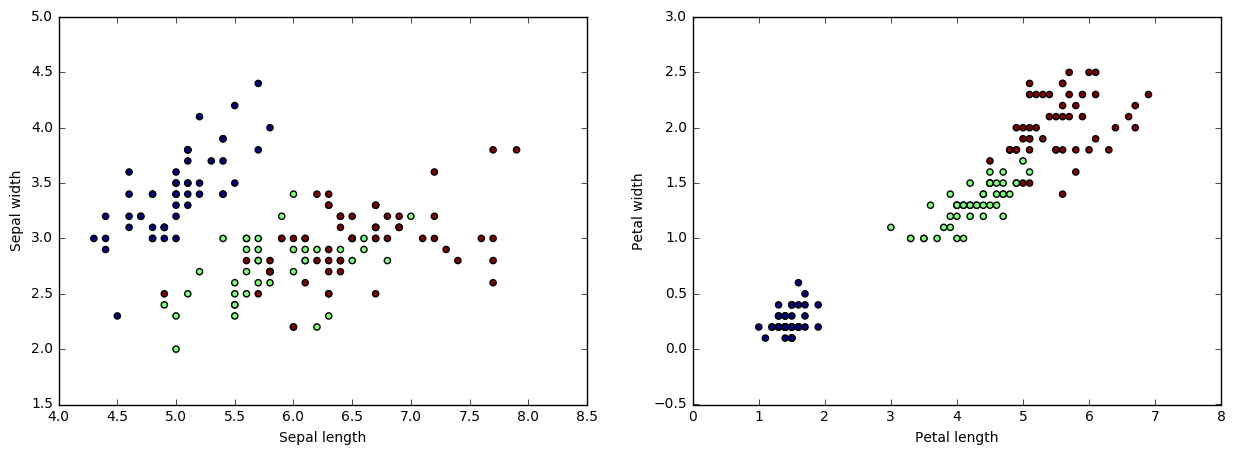

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

#### Create function to plot decision regions

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

# Splitting and scaling the dataset

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
## SPLITTING


X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal,y,test_size=0.3,random_state=0)

print("# training samples sepal: ", len(X_train_sepal))
print("# testing samples sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal,y,test_size=0.3,random_state=0)

print("# training samples petal: ", len(X_train_petal))
print("# testing samples petal: ", len(X_test_petal))

#####################################################################
## SCALING

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)

sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std = sc.transform(X_test_petal)

#####################################################################
## COMBINING FOR FUTURE PLOTTING

X_combined_sepal_standard = np.vstack((X_train_sepal_std,X_test_sepal_std))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

X_combined_petal_standard = np.vstack((X_train_petal_std,X_test_petal_std))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))

# training samples sepal:  105
# testing samples sepal:  45
# training samples petal:  105
# testing samples petal:  45


/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. SVM with LINEAR kernel

#### SVMs using linear kernel have one important parameter that can be tuned, and this is the inverse of the regularization parameter, which corresponds to C. 

#### Let's plot the decision regions by using linear kernels and changing the C parameter.

### 1.1. Sepal decision regions with linear kernel

   C_parameter  Accuracy
0         0.01       0.6
1         0.10  0.777778
2         1.00       0.8
3        10.00       0.8
4       100.00       0.8


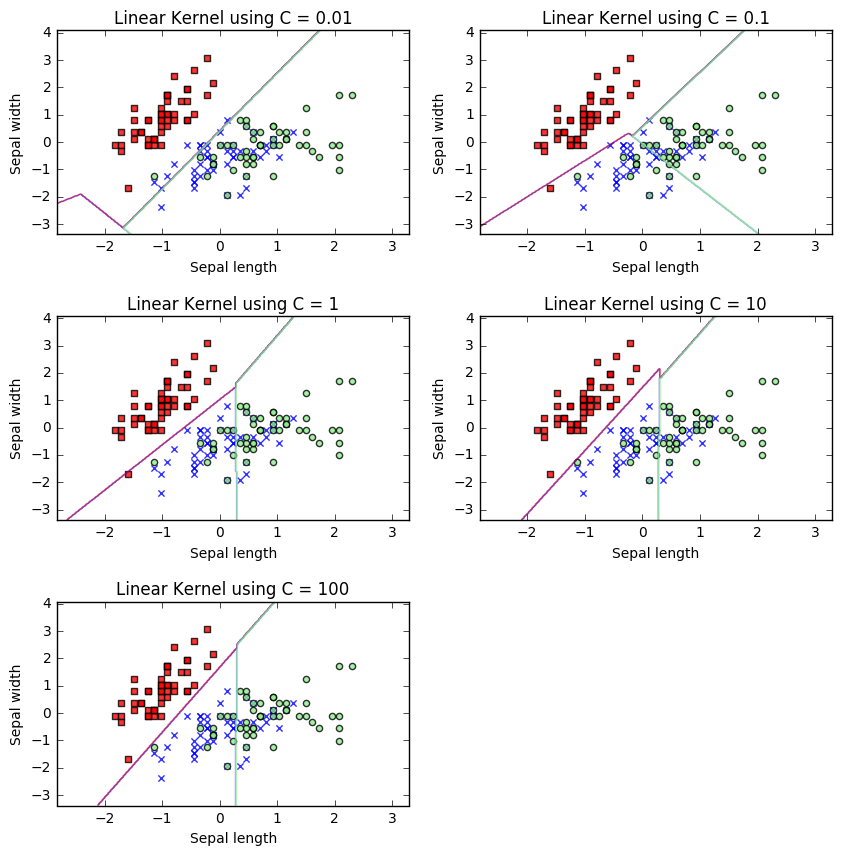

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_param_range = [0.01,0.1,1,10,100]

sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0

for i in C_param_range:
    
    # Apply SVM model to training data
    svm_linear =  SVC(kernel = 'linear', C = i, random_state = 0)
    svm_linear.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_linear.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_linear
                      , test_idx = range(105,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Linear Kernel using C = %s'%i)
    
print(sepal_acc_table)

### 1.2. Petal decision regions with linear kernel

   C_parameter  Accuracy
0         0.01       0.6
1         0.10  0.955556
2         1.00  0.977778
3        10.00  0.977778
4       100.00  0.977778


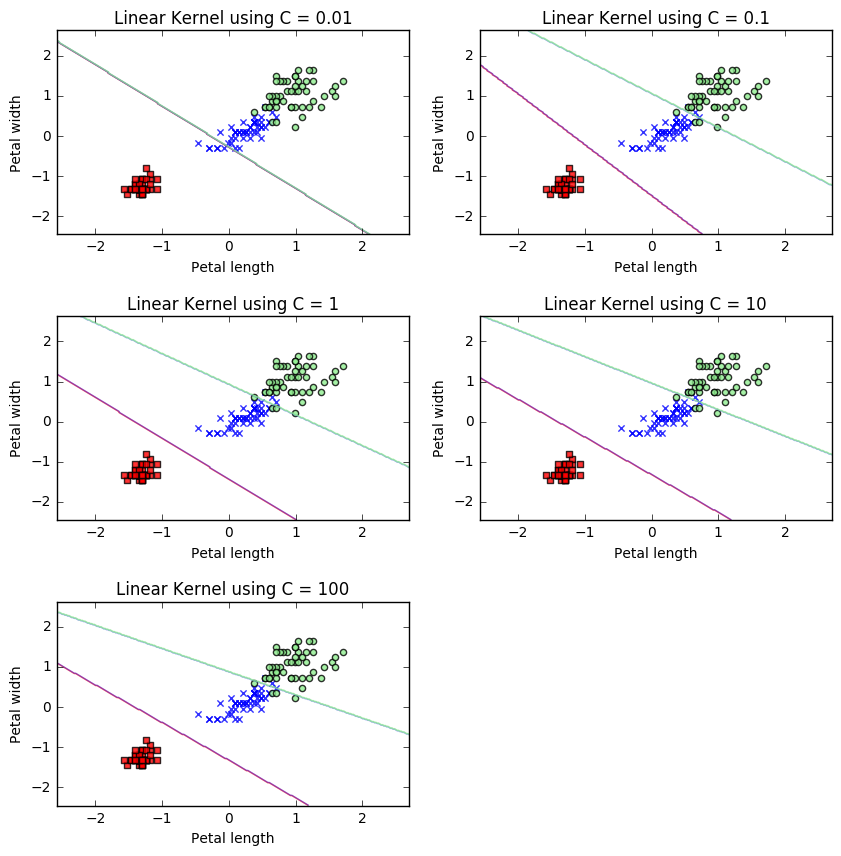

In [ ]:
petal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
petal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0

for i in C_param_range:
    
    # Apply SVM model to training data
    svm_linear =  SVC(kernel = 'linear', C = i, random_state = 0)
    svm_linear.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = svm_linear.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = svm_linear
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Linear Kernel using C = %s'%i)
    
print(petal_acc_table)

### 1.3. Validation curves for both datasets

   C_parameter  Train_scores  Test_scores  Difference
0         0.01      0.773420     0.760621    0.012800
1         0.10      0.793325     0.780229    0.013097
2         1.00      0.813428     0.754085    0.059343
3        10.00      0.820063     0.760621    0.059442
4       100.00      0.813329     0.754085    0.059244
5      1000.00      0.813329     0.754085    0.059244
   C_parameter  Train_scores  Test_scores  Difference
0         0.01      0.960091     0.960376   -0.000285
1         0.10      0.963458     0.960376    0.003082
2         1.00      0.960091     0.953431    0.006660
3        10.00      0.963458     0.960376    0.003082
4       100.00      0.963458     0.960376    0.003082
5      1000.00      0.963458     0.960376    0.003082


/opt/conda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


(0, 1)

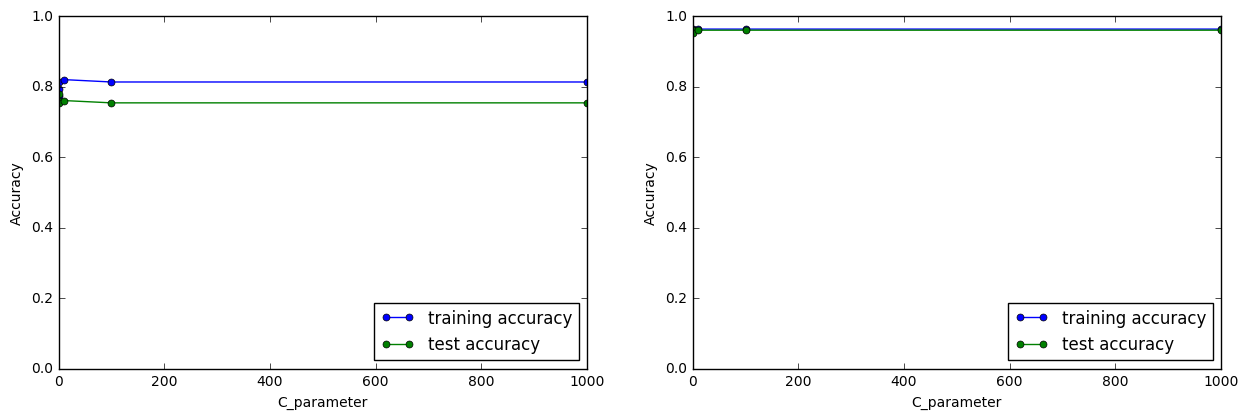

In [ ]:
from sklearn.learning_curve import validation_curve

C_param_range = [0.01,0.1,1,10,100,1000]

plt.figure(figsize=(15, 10))

# SEPAL Plot validation curve
train_sepal_scores, test_sepal_scores = validation_curve(estimator=svm_linear
                                                            ,X=X_combined_sepal_standard
                                                            ,y=Y_combined_sepal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,scoring='accuracy'
                                                            )


train_sepal_mean = np.mean(train_sepal_scores,axis=1)
train_sepal_std = np.std(train_sepal_scores,axis=1)
test_sepal_mean = np.mean(test_sepal_scores,axis=1)
test_sepal_std = np.std(test_sepal_scores,axis=1)

best_C_table_sepal = pd.DataFrame(columns = ['C_parameter','Train_scores','Test_scores','Difference'])
best_C_table_sepal['C_parameter'] = C_param_range
best_C_table_sepal['Train_scores'] = train_sepal_mean
best_C_table_sepal['Test_scores'] = test_sepal_mean
best_C_table_sepal['Difference'] = best_C_table_sepal['Train_scores'] - best_C_table_sepal['Test_scores']

print(best_C_table_sepal)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='o'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])

# PETAL Plot validation curve
train_petal_scores, test_petal_scores = validation_curve(estimator=svm_linear
                                                            ,X=X_combined_petal_standard
                                                            ,y=Y_combined_petal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,scoring='accuracy'
                                                            )


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std = np.std(train_petal_scores,axis=1)
test_petal_mean = np.mean(test_petal_scores,axis=1)
test_petal_std = np.std(test_petal_scores,axis=1)

best_C_table_petal = pd.DataFrame(columns = ['C_parameter','Train_scores','Test_scores','Difference'])
best_C_table_petal['C_parameter'] = C_param_range
best_C_table_petal['Train_scores'] = train_petal_mean
best_C_table_petal['Test_scores'] = test_petal_mean
best_C_table_petal['Difference'] = best_C_table_petal['Train_scores'] - best_C_table_petal['Test_scores']

print(best_C_table_petal)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='o'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])

# 2. SVM with POLYNOMIAL kernel

#### In this case we can tune both the C parameter and the polynomial order of the kernel. Let's start simple, and test how the polynomial order affects the classification by keeeping the C parameter constant and = 1 (no regularization applied).

### 2.1 Sepal decision regions

   degree  Accuracy
0       1       0.8
1       2  0.622222
2       3  0.666667
3       4       0.4
4       5  0.644444
5       6  0.377778


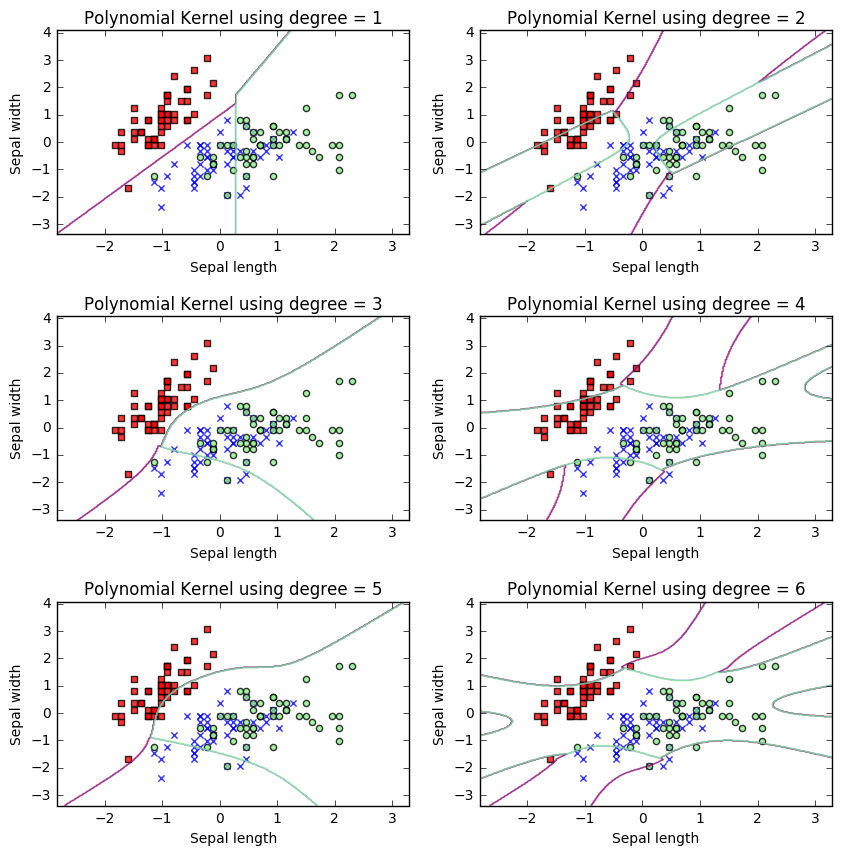

In [ ]:
polynomial_degree_range = [1,2,3,4,5,6] 

sepal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
sepal_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in polynomial_degree_range:
    
    # Apply SVM model to training data
    svm_poly =  SVC(kernel = 'poly', degree = i, C = 1, random_state = 0)
    svm_poly.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_poly.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_poly
                      )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(sepal_acc_table)

### 2.2 Petal decision regions

   degree  Accuracy
0       1  0.977778
1       2  0.888889
2       3  0.933333
3       4  0.844444
4       5  0.933333
5       6  0.777778


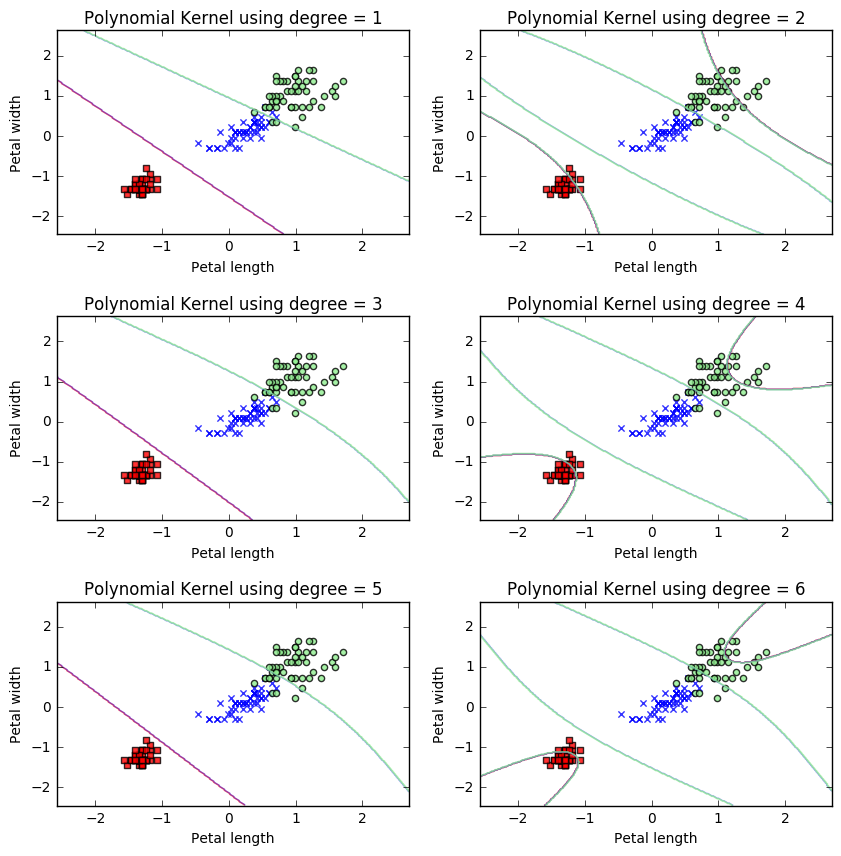

In [ ]:
polynomial_degree_range = [1,2,3,4,5,6] 

petal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
petal_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in polynomial_degree_range:
    
    # Apply SVM model to training data
    svm_poly =  SVC(kernel = 'poly', degree = i, C = 1, random_state = 0)
    svm_poly.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = svm_poly.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = svm_poly
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(petal_acc_table)

# 3. SVM with RADIAL BASIS FUNCTION kernel

### 3.1 Sepal decision regions

   degree  Accuracy
0       1  0.777778
1       2  0.777778
2       3  0.777778
3       4  0.777778
4       5  0.777778
5       6  0.777778


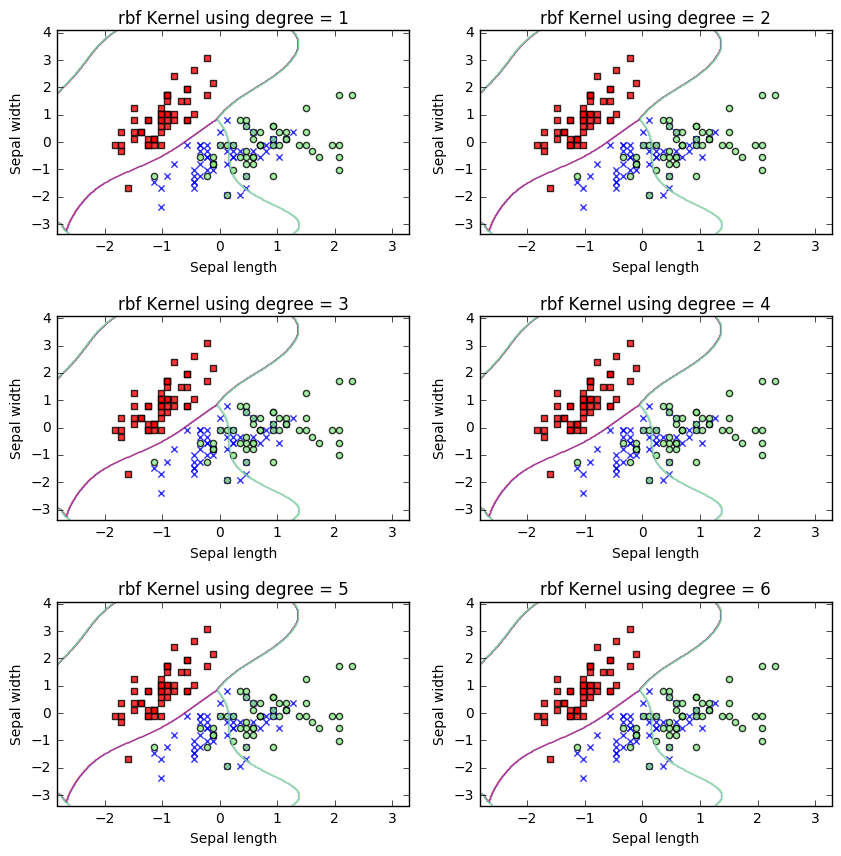

In [ ]:
rbf_degree_range = [1,2,3,4,5,6]

sepal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
sepal_acc_table['degree'] = rbf_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in rbf_degree_range:
    
    # Apply SVM model to training data
    svm_rbf =  SVC(kernel = 'rbf', degree = i, C = 1, random_state = 0)
    svm_rbf.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_rbf.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_rbf
                      )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('rbf Kernel using degree = %s'%i)
    
print(sepal_acc_table)

### 3.2. Petal decision regions

   degree  Accuracy
0       1  0.977778
1       2  0.977778
2       3  0.977778
3       4  0.977778
4       5  0.977778
5       6  0.977778


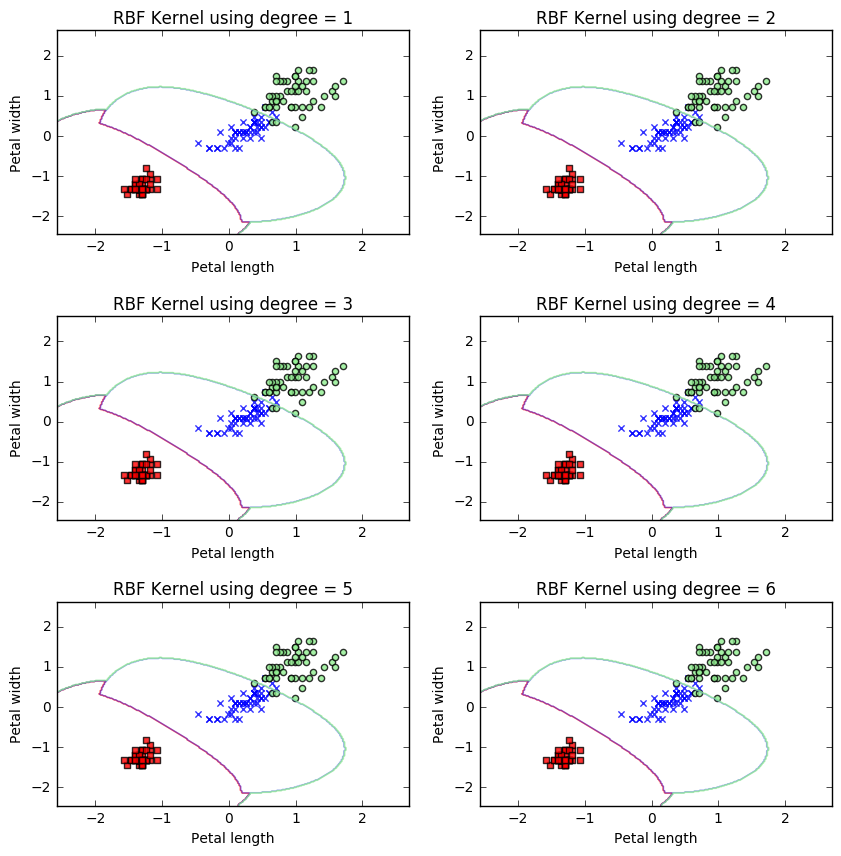

In [ ]:
rbf_degree_range = [1,2,3,4,5,6] 

petal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
petal_acc_table['degree'] = rbf_degree_range



plt.figure(figsize=(10, 10))

j = 0

for i in rbf_degree_range:
    
    # Apply SVM model to training data
    svm_rbf =  SVC(kernel = 'rbf', degree = i, C = 1, random_state = 0)
    svm_rbf.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = svm_rbf.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = svm_rbf
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('RBF Kernel using degree = %s'%i)
    
print(petal_acc_table)